# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

plt.style.use('ggplot')

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

/Users/dluna/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [4]:
print data.describe()

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

In PCA, the first principle component will have the highest variance in the data. Based on this we could say the first component would be Fresh. We find future components the same way but constrained to be orthogonal to preceding components. Thus it would be difficult to predict what the 2nd principle component might be.

I think it's fair to assume the the features in the data are independent of eachother. For example, it's unlikely the amount of Milk purchased is a function of Grocery, etc. Based on this I'd think the vectors for ICA will be largely independent of eachother. Building on this idea a bit more, I think each vector will have a larger weighting a category.

### PCA

In [5]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(data)
print pca

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

PCA(copy=True, n_components=6, whiten=False)
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


([<matplotlib.axis.XTick at 0x111d99e90>,
 <a list of 7 Text xticklabel objects>)

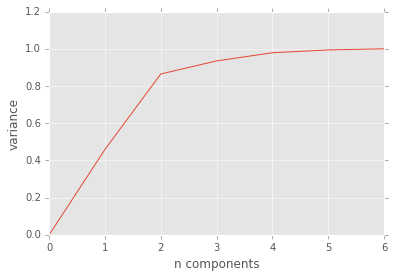

In [6]:
y = [0.0] + list(np.cumsum(pca.explained_variance_ratio_))
x = range(len(pca.explained_variance_ratio_)+1)
plt.figure(1)
plt.plot(x, y, '-')
plt.xlabel('n components')
plt.ylabel('variance')
plt.xticks(x)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The first 2 components supply ~86.5% of the variance, after this the variance drops rougly by the same amount per dimension except the last since at that point we've already covered 99% of the variance in the first 5.

Based on the above I would choose 3 dimensions for my analysis, at this point we have 93.48% data preservation. We also have 3 dimensions which could still be useful for visualizations. One could also make the case for 2 dimensions since this would allow for simpler 2D plots.

**3)** What do the dimensions seem to represent? How can you use this information?

In [7]:
pca.components_[:2]

array([[-0.97653685, -0.12118407, -0.06154039, -0.15236462,  0.00705417,
        -0.06810471],
       [-0.11061386,  0.51580216,  0.76460638, -0.01872345,  0.36535076,
         0.05707921]])

Answer: 

The first component [-0.97653685, -0.12118407, -0.06154039, -0.15236462,  0.00705417, -0.06810471] has a large negative weight towards Fresh products relative to all other categories. 5/6 of the weights are negative.

The second component [-0.11061386,  0.51580216,  0.76460638, -0.01872345,  0.36535076, 0.05707921] has the largest weight for Grocery of 0.76. It also has strong weights of 0.515 and 0.365 for Milk and Detergents_Paper respectively. 4/6 of the weights are positive.

The weights signify how important categories are that particular component. These first two components account for ~86.5% of the variance in the dataset. Thus, what the weights say carry a lot of weight.

Since the 1st component showed such a strong signal for Fresh products we can conclude Fresh is the most important category. The 2nd component showed strong signals, in their respective order for Grocery, Milk, and Detergents_Paper categories. We can view these categories as the 2nd tier. Notice strong signals for Frozen and Delicatessen were not present in the first two components. This might mean these product categories aren't actually all that important when describing a customer as a whole.

### ICA

In [8]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6, random_state=42)
X = data - data.mean(axis=0) # cleaner if we do this step now
X /= X.std(axis=0)
S = ica.fit_transform(X)
A = ica.mixing_
W = ica.components_ # inverse of A
n = ica.mean_

# Print the independent components
print W # unmixing matrix
print A

[[-0.01092072 -0.00108702  0.00731609  0.05411747 -0.00254425 -0.01677584]
 [ 0.00254077 -0.01234233  0.06920747  0.00142537 -0.01376418 -0.00544717]
 [-0.00491164 -0.00154072 -0.00562786 -0.00252788  0.00238715  0.05098745]
 [-0.00336665  0.01865122  0.1091143  -0.00724067 -0.13353828 -0.01604104]
 [-0.05032368  0.0064794   0.00749098  0.00322781 -0.01148445  0.00271098]
 [-0.00194074 -0.07253711  0.05654051  0.0016755  -0.01715991  0.01697522]]
[[  1.64890301   0.45801413   2.79143065   1.93145766 -20.54984073
   -1.50092445]
 [  0.59402871  11.92899206   6.95935334   0.87383738   0.34181061
  -15.71729153]
 [ -0.58000358  20.31885809   2.67561999  -1.642622     1.14800737
   -3.82524923]
 [ 19.17881893  -1.02157739   6.77284012   0.35747993  -4.87533671
   -0.60101669]
 [ -1.60924891  18.10241199   0.23264984  -8.83225109   2.02999475
   -5.15066346]
 [  1.13896796   1.74915279  20.7120878    0.46239058  -2.17928232
   -0.83039699]]


In [9]:
print np.allclose(X, np.dot(S, A.T) + n) # back to original data, X = S * A.T + n
print np.allclose(S, np.dot(X - n, W.T)) # inverse, S = (X-n) * W.T

True
True


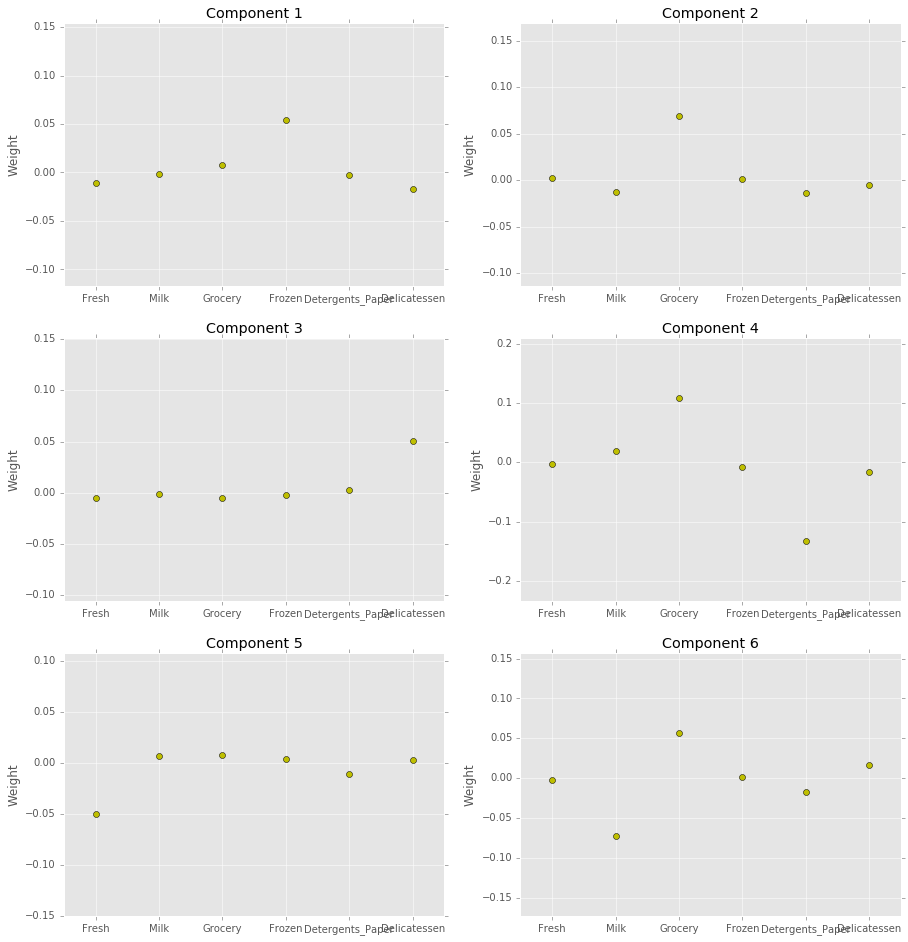

In [10]:
# plot all ICA components
plt.figure(1, figsize=(15,16))
for i, component in enumerate(W):
    # 6 components 3 row, 2 cols
    plot_n = int('32' + str(i+1))
    plt.subplot(plot_n)
    plt.xticks(range(6), list(data.columns))
    # pads on axis
    plt.xlim(-0.5, 5.5)
    plt.ylim(min(component)-0.1, max(component)+0.1)
    plt.title('Component {}'.format(i+1))
    plt.ylabel('Weight')
    plt.plot(component, 'yo')

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

Component 1

- strong Frozen weight
- (+ weight) Grocery, Frozen
- (- weight) Fresh, Milk, Detergents_Paper, Delicatessen

Component 2

- strong Grocery weight
- (+) Fresh, Grocery, Frozen
- (-) Milk, Detergents_Paper, Delicatessen

Component 3

- strong Delicatessen weight
- (+) Detergents_Paper, Delicatessen
- (-) Fresh, Milk, Grocery, Frozen

Component 4

- strong Grocery and Detergents_Paper weights
- (+) Milk, Grocery
- (-) Fresh, Frozen, Detergents_Paper, Delicatessen

Component 5

- strong Fresh weight
- (+) Milk, Grocery, Frozen, Delicatessen
- (-) Fresh, Detergents_Paper

Component 6

- strong Milk and Grocery weights
- (+) Grocery, Frozen, Delicatessen
- (-) Milk, Fresh, Detergents_Paper

The weights represent how strong a signal is for a category. We can interpret this as each component captures a fraction of the total information presented, but captures more information of a particular category. So, for example, component 1 captures more information about the Frozen category than any other individual component.

Component 3 and 6 are perhaps the most interesting due to two categories having strong signals and an opposite trajectory (+ vs. -) at that. This might be related to the 2nd component in our previous PCA analysis where Grocery, Milk and Detergents_Paper were all strongly weighted. Grocery had the largest weight out of the 3 so this could be, especially given + vs. - relationship competetion between the signals. A postive Grocery signal is correlated with negative Milk and Detergents_Paper signals. This in turn could be interpreted as the more Grocery one purchases the less Milk and Detergents_Paper one purchases and vice-versa.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K Means vs GMM (based on EM algorithm)

General

* K Means hard assigns points to clusters.
* GMM softs assigns points to clusters. This gives assignment a probabilistic interpretation where with probability a1 point p is assigned to cluster k1, probability a2 assigned to k2, etc. This is derived from the assumption that points are generated from an aggregate of Gaussian distributions and Gaussians have infinite range.
* K Means chooses clusters by minimizing the sum of squares distances within a cluster (euclidean distances). This makes it well suited to convex problems but performance worses with non-convex problems due to local optima. It's also better suited to low/medium dimensions since in high dimensions euclidean distances become inflated.
* GMM is based on the probability of a point belonging to a cluster. It maximizes the likelihood of a point belonging to a cluster.

Speed / Scalability

* K Means scales with large datasets and medium-sized dimensions, O(k * n) where k = number of clusters and n = number of data points.
* In general EM is not tractable due to latent variables being involved. The algorithm requires summing over all latent variables Z. If we think of Z as a sequence of events, all combinations of this requires exponential computation.

Complexity

* K Means is conceptually simpler than EM, this makes sense K Means is a special case of EM. K Mmeans is equivalent to the expectation-maximization algorithm with a small, all-equal, diagonal covariance matrix.

Based on the size of our dataset I don't think we should be about scalability. I think in general it's a good idea to, when possible, bias towards the simpler model. In this case that would imply K Means. Also, since we're projected our datapoints to a 2D space via PCA I think this fits the objective of K Means well, which is based on euclidean distance. So we'll choose K Means!

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [33]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [34]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [35]:
def cluster(clf, data, **kwargs):
    return clf(**kwargs).fit(data)

kmeans6 = cluster(KMeans, reduced_data, n_clusters=6)
kmeans5 = cluster(KMeans, reduced_data, n_clusters=5)
kmeans4 = cluster(KMeans, reduced_data, n_clusters=4)
kmeans3 = cluster(KMeans, reduced_data, n_clusters=3)
print kmeans6

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [42]:
# Put the result into a color plot

def cluster_plot(clusters):
    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    centroids = clusters.cluster_centers_
    print 'Cluster centers: \n', centroids

    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross\n Number of Clusters = {}'.format(len(centroids)))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

Cluster centers: 
[[  7177.17913696   6446.09370654]
 [-37704.64157991  -5488.35405895]
 [-20964.64986166  68819.21772923]
 [ -9351.85448379  -4667.83404401]
 [  2787.06628956  24275.2601508 ]
 [  6035.6523743   -5702.59417982]]


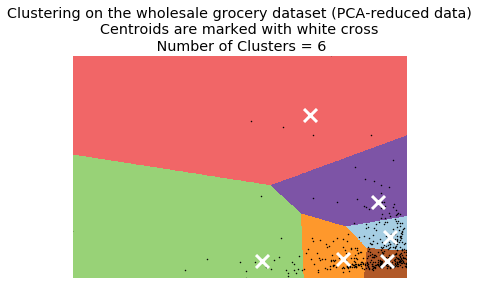

Cluster centers: 
[[  6399.7117556   -4169.29690862]
 [ -9052.39957144  -4808.55909102]
 [-14537.71774395  61715.67085248]
 [-37704.64157991  -5488.35405895]
 [  5607.91709853  14199.18040025]]


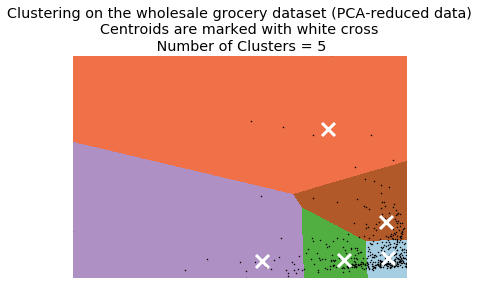

Cluster centers: 
[[  5710.98964991  12661.45687292]
 [-24220.71188261  -4364.45560022]
 [-14537.71774395  61715.67085248]
 [  3542.08605212  -4936.7212132 ]]


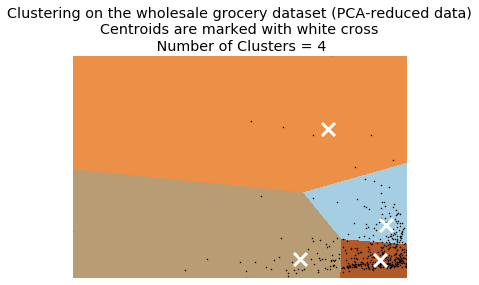

Cluster centers: 
[[  4165.1217824   -3105.15811456]
 [  1341.31124554  25261.39189714]
 [-23978.86566553  -4445.56611772]]


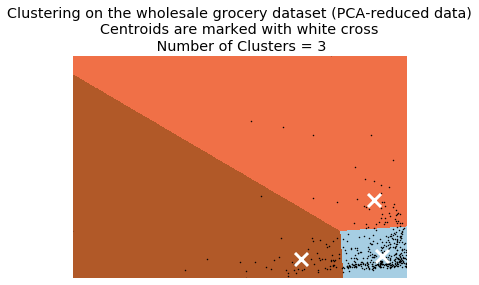

In [43]:
cluster_plot(kmeans6)
cluster_plot(kmeans5)
cluster_plot(kmeans4)
cluster_plot(kmeans3)

**7)** What are the central objects in each cluster? Describe them as customers.

An argument could be made for probably any of the 3,4,5,6 cluster options above but to me 5 seemed to be the most natural fit.

Cluster centers: 
[[  6399.7117556   -4169.29690862]
 [ -9052.39957144  -4808.55909102]
 [-14537.71774395  61715.67085248]
 [-37704.64157991  -5488.35405895]
 [  5607.91709853  14199.18040025]]


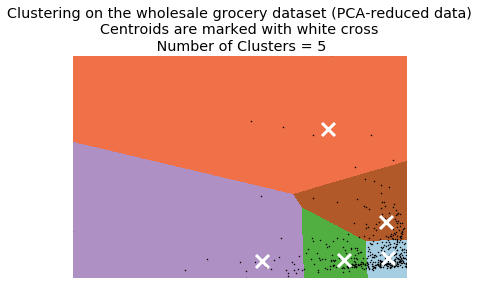

In [46]:
cluster_plot(kmeans5)

In [48]:
print data.columns
pca.inverse_transform(centroids5)

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')


array([[  6211.92540607,   2870.19044075,   4369.56545867,   2174.90581422,
          1403.38205406,    851.03975249],
       [ 21372.19271482,   4413.00738082,   4831.71051716,   4541.23007042,
          1060.8252546 ,   1866.91273496],
       [ 19370.30640273,  39391.08197527,  56034.13012234,   4131.43508737,
         25326.80900245,   6037.63944431],
       [ 49427.35748872,   7534.56299422,   6075.20517973,   8919.5461264 ,
           610.34375945,   3779.46321341],
       [  4953.3339517 ,  12440.64358789,  18462.94784529,   1951.62595502,
          8108.73378774,   1953.42293083]])

Answer:

**Centroid 1 (Teal) **

Highest purchase is Fresh products (6k). Purchases other categories in small to very small amounts.

**Centroid 2 (Green) **

This customer favours Fresh products over everything else (21k). Purchases roughly the same amount of Milk, Grocery and Frozen. Very small purchases of Detergents_Paper and Delicatessen. 

**Centroid 3 (Orange) **

Highest purchase is Grocery products (56k). Also purchases Fresh, Milk and Detergents_Paper is high quantities. Modest purchases of Frozen and Delicatessen products.

In general this type of customer tends to purchase more than other customer types.

**Centroid 4 (Purple) **

Highest purchase is Fresh products (49k). Similar to customer type 1 in purchase distribution just purchases in higher amounts.

**Centroid 5 (Brown) **

Highest purchase is Grocery products (18k). Also purchases Milk and Detergent_Paper in moderate amounts.


### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

In [148]:
data.sum(axis=0)

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

Answer: 

K Means.

From the K Means visualization we can see distinct clusters, which could represent types of customers. We could also see there is a trend in general to the lower right corner, perhaps suggesting there are cross cluster commonalities. 

In more detail, the data forms an L shape. From the our above interpretation of the clusters we can see larger purchases tend to be placed farther from the bottom right. In general it seems smaller purchases is the commonality of the bottom right. We can also see the x-axis is aligned with Fresh product purchase quantities while the y-axis is aligned with Grocery purchases quantities.

We can also see customers who purchase large quantities of the Fresh product purchase lesser quantities of the other 5 categories while customers who purchase large quantities of Grocery products also have sizeable purchases of Milk, Frozen and Detergents_Paper products. This ties in well with our prior PCA analysis.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

Well we could try to answer why customers who buy large quantities of Fresh products tend to much smaller quantities of all other products.

It might be that these customers only have use case for Fresh products, for example, a farmers market. But, it could also just be they feel the prices for other products are too high.

We could design an A/B test based around providing a discount to high volume Fresh product purchasers. Perhaps to 20% of these customers we give a 30% discount on non-Fresh products (it would have to be some justifiable number, doesn't make sense if we lose money in the long run).

So what should our target be?

It could either of a binary label over some purchase threshold or a continuous number. Either way I think a good measure would be the aggregate of purchases over all products. I think a continuous number would provide us with more value than a binary label.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

We could use the results from our A/B test to predict if a customers aggregate purchases would increase if we provided a discount on non-Fresh products. We could accomplish this using a supervised learning technique like Linear Regression and comparing the output of the prediction with the mean of aggregated purchase histories. If the prediction is greater than the aggregate mean it might be a good idea to alter our pricing scheme for this type of customer.